# Model Selection

## Best-ubset Selection

In [1]:
library(ISLR)
summary(Hitters)

     AtBat            Hits         HmRun            Runs       
 Min.   : 16.0   Min.   :  1   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:255.2   1st Qu.: 64   1st Qu.: 4.00   1st Qu.: 30.25  
 Median :379.5   Median : 96   Median : 8.00   Median : 48.00  
 Mean   :380.9   Mean   :101   Mean   :10.77   Mean   : 50.91  
 3rd Qu.:512.0   3rd Qu.:137   3rd Qu.:16.00   3rd Qu.: 69.00  
 Max.   :687.0   Max.   :238   Max.   :40.00   Max.   :130.00  
                                                               
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 28.00   1st Qu.: 22.00   1st Qu.: 4.000   1st Qu.:  816.8  
 Median : 44.00   Median : 35.00   Median : 6.000   Median : 1928.0  
 Mean   : 48.03   Mean   : 38.74   Mean   : 7.444   Mean   : 2648.7  
 3rd Qu.: 64.75   3rd Qu.: 53.00   3rd Qu.:11.000   3rd Qu.: 3924.2  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0 

There are some missing value here, so before we proceed we will remove them

In [2]:
Hitters = na.omit(Hitters)
with(Hitters,sum(is.na(Salary)))

[1] 0

### Best subset regression

Use the package 'leaps' to evaluate all the best-subset models.

In [5]:
library(leaps)
regfit.full = regsubsets(Salary~., data=Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " "

By default, it gives best-subset up to size 8. Let's change it to 19.

In [8]:
regfit.full = regsubsets(Salary~., data=Hitters, nvmax=19)
reg.summary = summary(regfit.full)
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

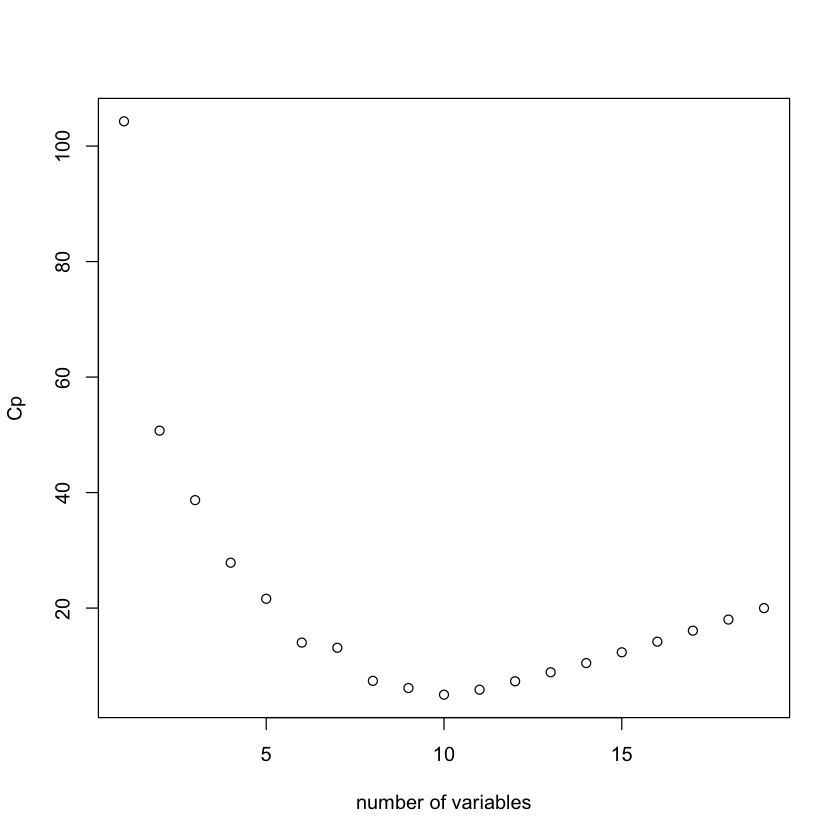

In [9]:
plot(reg.summary$cp, xlab='number of variables', ylab='Cp')

In [10]:
which.min(reg.summary$cp)

[1] 10

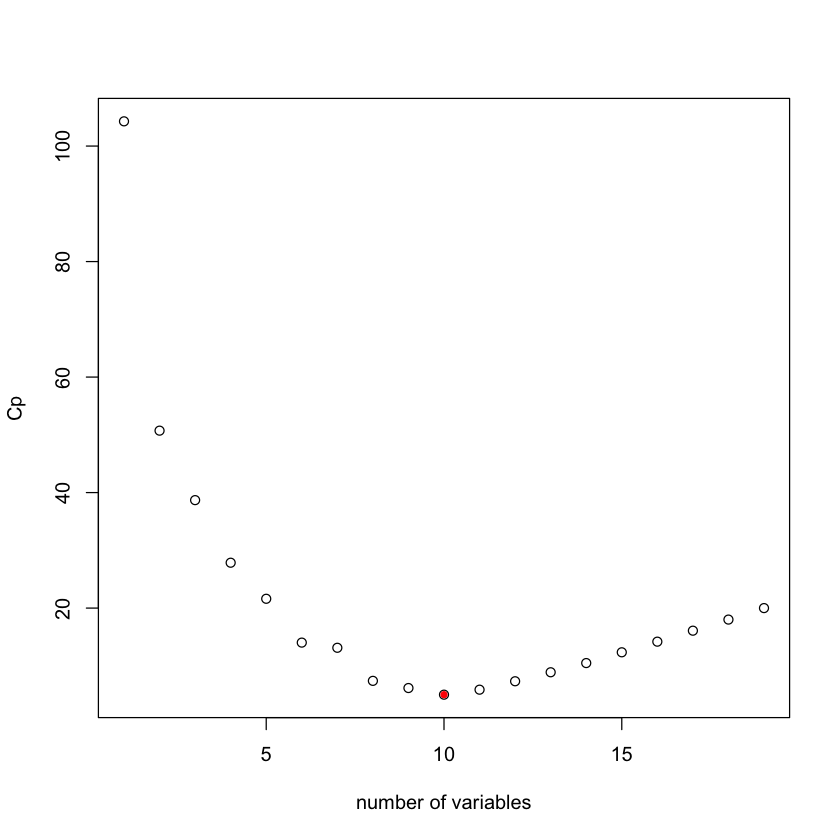

In [11]:
plot(reg.summary$cp, xlab='number of variables', ylab='Cp')
points(10, reg.summary$cp[10], pch=20, col='red')

There is a plot method for the 'regsubset' subject, let's use it

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

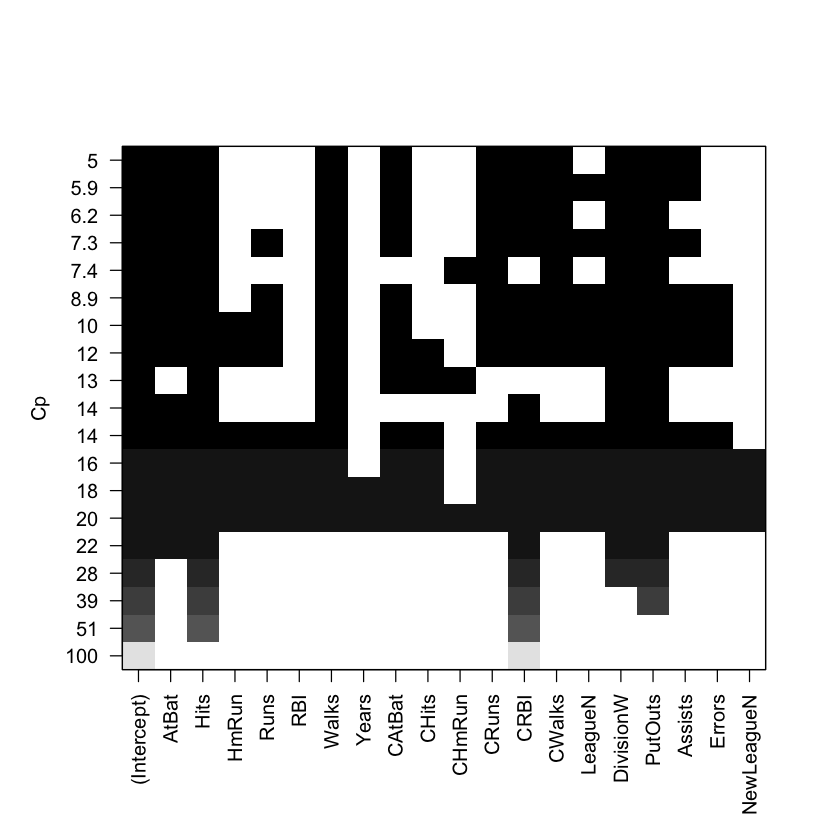

In [12]:
plot(regfit.full, scale='Cp')
coef(regfit.full, 10)

## Forward Stepwise Slection

Here we use regsubsets but with 'method="forward"'

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

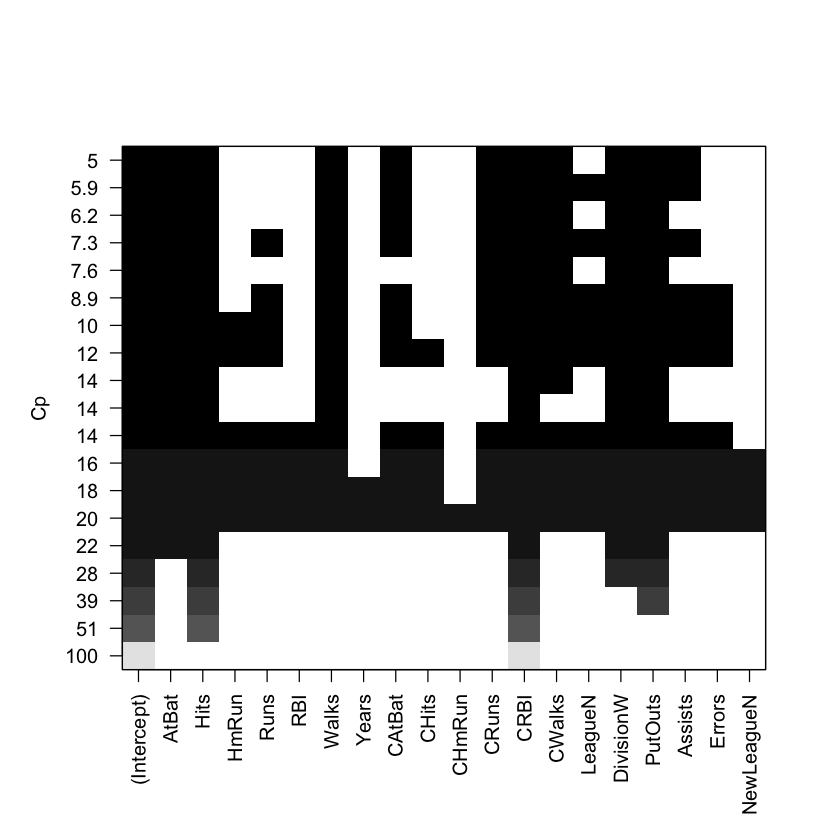

In [13]:
regfit.fwd = regsubsets(Salary~., data=Hitters, nvmax=19, method="forward")
summary(regfit.fwd)
plot(regfit.fwd, scale = "Cp")

### Using a Validation Set

Let's make a traintring and validation set, so that we can choose a good subset model.
We will do it using a slightly different approach from what was done in the book.

In [35]:
dim(Hitters)
set.seed(1)
train = sample(seq(263), 180, replace=FALSE)
train

[1] 263  20

[1] 167 129 187  85  79 213  37 105 217 110 229 165  34 106 126  89 172 207
 [19]  33  84 163  70  74  42 166 111 148 156  20  44 121  87 242 233  40 247
 [37]  25 119 198 122  39 179 240 134  24 160  14 130  45 146  22 206 193 115
 [55] 104 231 208 209 103  75  13 253 176 248  23 254 244 205  29 141 150 236
 [73] 108  48 245 215 149  31 102 145  73 232  83 118  90 190 107  64 196  60
 [91]  51 251 138 262  43  26 143 195 152 178 223 219 202 181 222 169   1 239
[109]  78 211 246  28 116 257  61 113  86  71 225  99 173 234  49 256 174 194
[127]  50 135 238 235 230 263  53 100 164  65 142 175 140 124 224  77 159  98
[145]  66  19  17 228 204 186  35 144  46 180 109 210  16 161   9 137  92 162
[163]  10 259  32 243  95 154  93  12 255 177  15   2 128  67 183 117 197   5

In [36]:
regfit.fwd = regsubsets(Salary~., data=Hitters[train,], nvmax=19, method="forward")

Now we will make predictions on the observations not used for training.
We know ther are 19 models, so we set up some vectors to record the errors. We have to do a bit of work here, because there is no predict method for 'regsubsets'

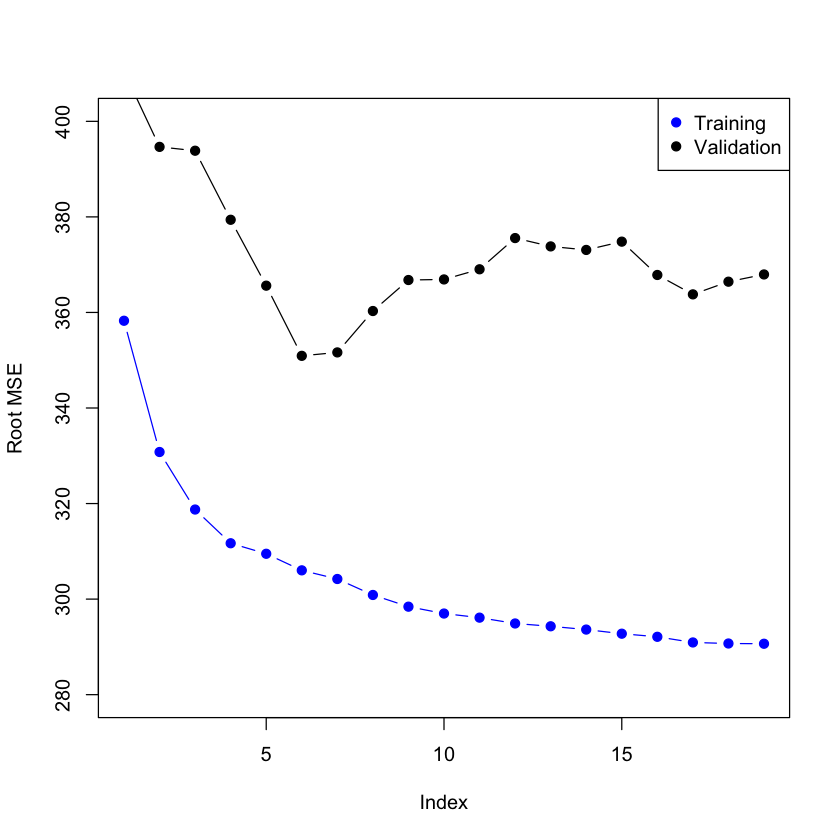

In [40]:
val.errors = rep(NA, 19)
x.test = model.matrix(Salary~., data=Hitters[-train,])
for(i in 1:19){
    coefi = coef(regfit.fwd, id=i)
    pred=x.test[, names(coefi)]%*%coefi
    val.errors[i]=mean((Hitters$Salary[-train]-pred)^2)
}

plot(sqrt(val.errors), ylab='Root MSE', ylim=c(280,400), pch=19, type = 'b')
points(sqrt(regfit.fwd$rss[-1]/180), col='blue', pch=19,type = 'b')
legend('topright', legend = c('Training', 'Validation'), col=c('blue', 'black'), pch=19)

We can see as we expect, the training error goes down monotonicallay as the model gets bigger, but not so for the validation error.

Let's write a predict method for regsubset

In [41]:
predict.regsubsets=function(object, newdata, id, ...){
    form = as.formula(object$call[[2]])
    mat = model.matrix(form, newdata)
    coefi=coef(object, id = id)
    mat[, names(coefi)]%*%coefi
}

### Model Selection by Cross-Validation

We'll do 10-fold cross-validation. Its really easy!

In [42]:
set.seed(1)
folds = sample(rep(1:10, length=nrow(Hitters)))
folds

[1]  7  9  7  5  9  3  7  5  7 10  9  5  4  6  6  9  2  7  3  4  3 10  4  2  6
 [26]  1  8  6 10  4  1  7  2  3 10  7  5  9  8  2  9  9 10  4  4 10  4 10  5  6
 [51]  2  6  3  5  4  1  8  9  3  5  3  3  6  8  3  4  4  5  9  1 10  6  8  8  5
 [76]  5  9  1  2  5  3  2  3  8 10 10  7  4  6 10  1  1  8  2  3  6  3  5  2  8
[101]  3  9  2  1  2  9  1  9  8  1  6  8  6  7  1  3  6  1  5  9  3  4  9  6  4
[126]  4 10  5  8  5 10  3  3 10  4  5  2  5 10  4  4  7  9  8  6  9  7  8  4  6
[151]  5  4  6 10  9 10  6  1  9  7  2  2 10  9  2  3  5  4  3  2  5  7  5  2  8
[176]  7  3  7  7  5  1  4  2  6  1  8  2  1  7  1  7  1  2 10  3 10 10  6  6  7
[201]  2  8  6  1  2  2  5  7  5  1  8  6  4  7  4  3  5  6  7  2  6  2 10  9 10
[226]  3  1  8  7  7  4  1  9  9  1  9  8  7  8  2  1  9 10  3  4  1  4  8 10  9
[251]  1  8  8  7  6  8  3  2  8  5 10  1  3

In [43]:
table(folds)
cv.errors=matrix(NA, 10, 19)

folds
 1  2  3  4  5  6  7  8  9 10 
27 27 27 26 26 26 26 26 26 26 

In [51]:
for(k in 1:10){
    best.fit=regsubsets(Salary~., data=Hitters[folds!=k,], nvmax=19, method='forward')
    for(i in 1:19){
        pred=predict(best.fit, Hitters[folds==k,], id=i)
        cv.errors[k, i]=mean((Hitters$Salary[folds==k]-pred)^2)
    }
}

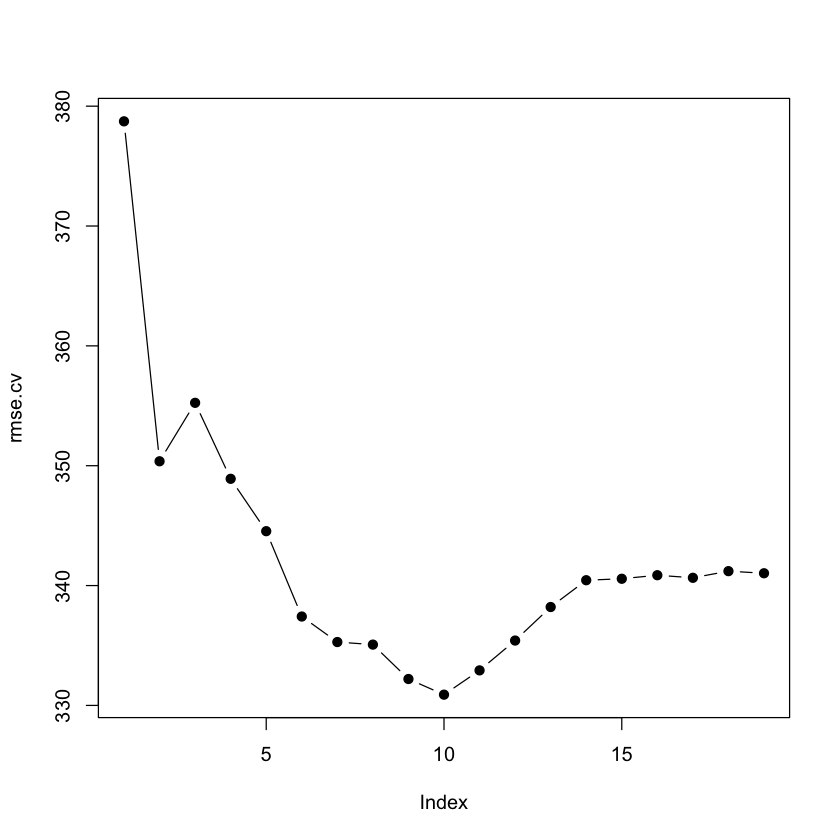

In [52]:
rmse.cv=sqrt(apply(cv.errors, 2, mean))
plot(rmse.cv, pch=19, type = 'b')

### Ridge Regression and the Lasso

We will use the package 'glmnet', which does not use the model formula lamguage, so we will set up an 'x' and 'y'.

In [55]:
library(glmnet)
x=model.matrix(Salary~.-1, data=Hitters)
y=Hitters$Salary

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-18



First we will fit a ridge-regression model. This is achieved by calling 'glmnet' with 'alpha=0' (see the helpfile). There is also a 'cv.glmnet' function which will do the cross-validation for us.

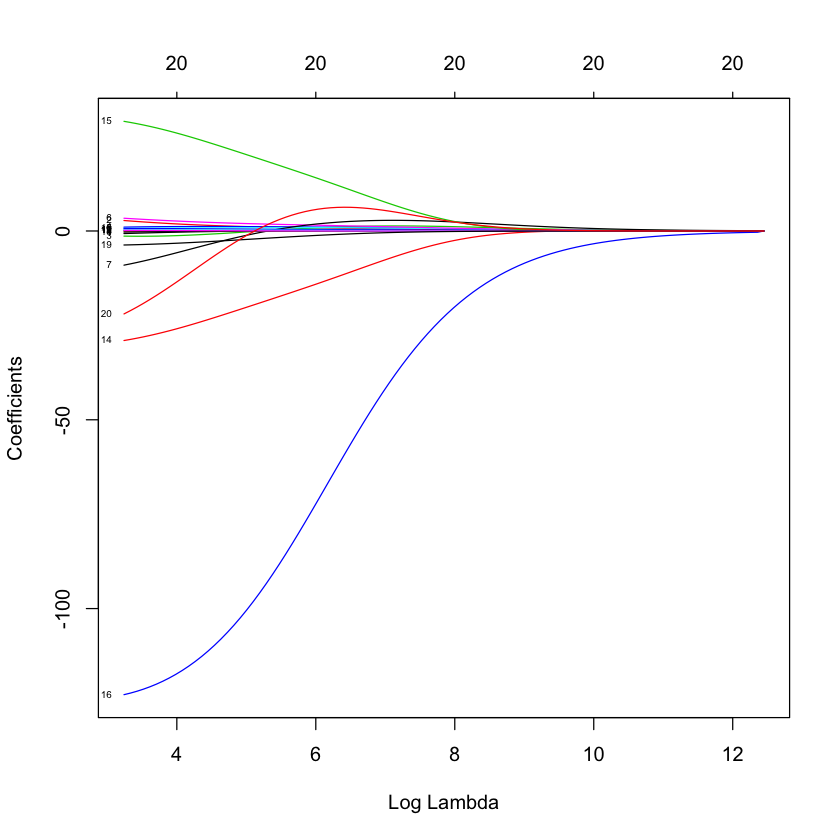

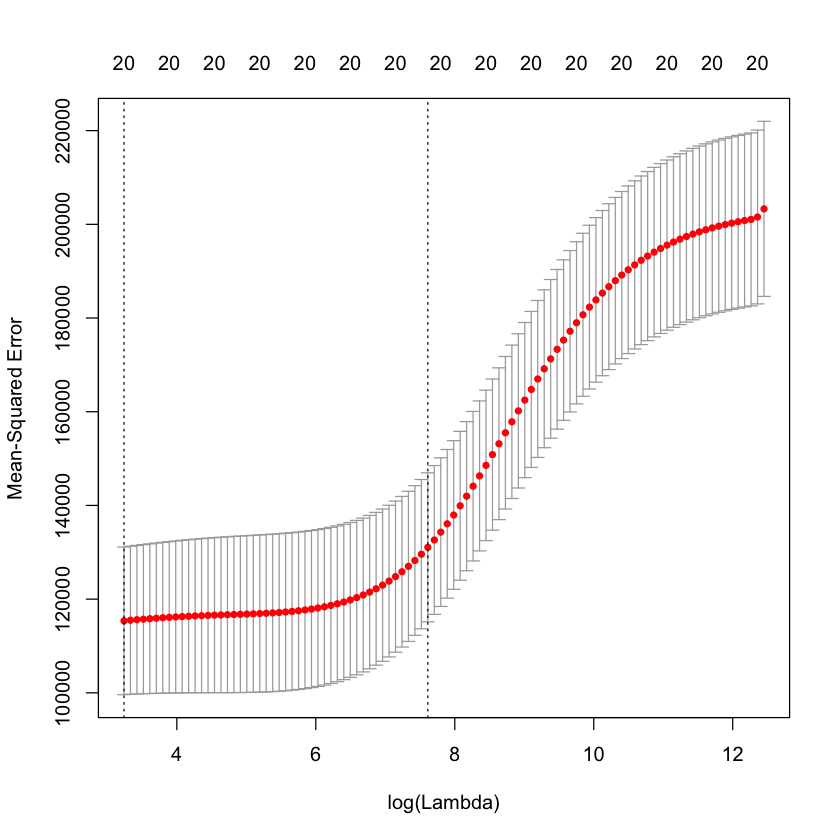

In [59]:
fit.ridge = glmnet(x, y, alpha=0)
plot(fit.ridge, xvar = 'lambda', label = TRUE)
cv.ridge=cv.glmnet(x,y, alpha=0)
plot(cv.ridge)

Now we fit a lasso model; for this we use the default 'alpha=1'

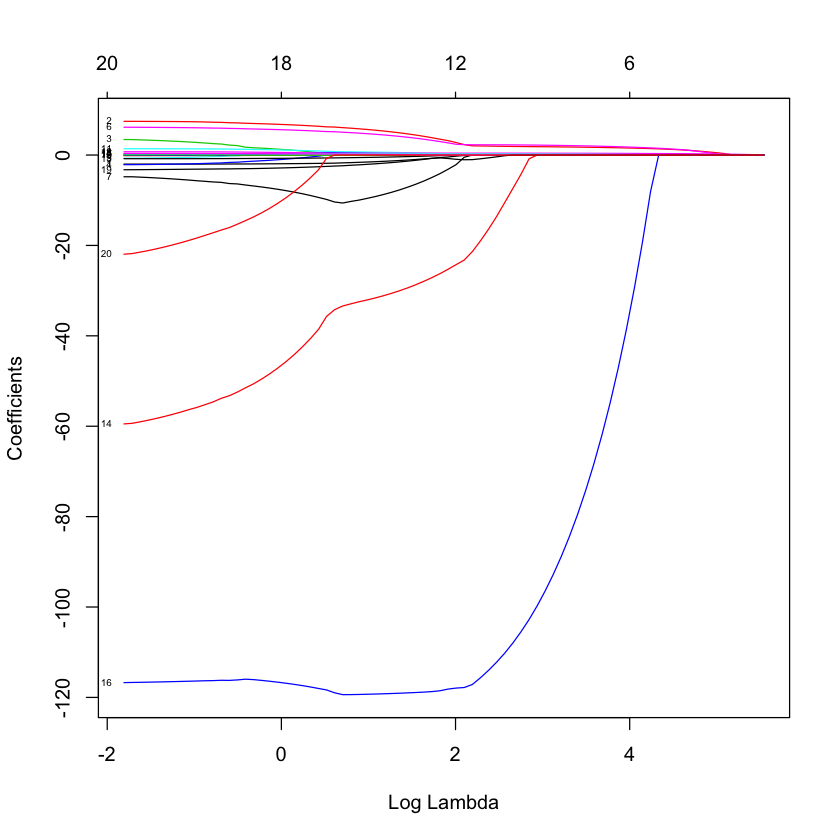

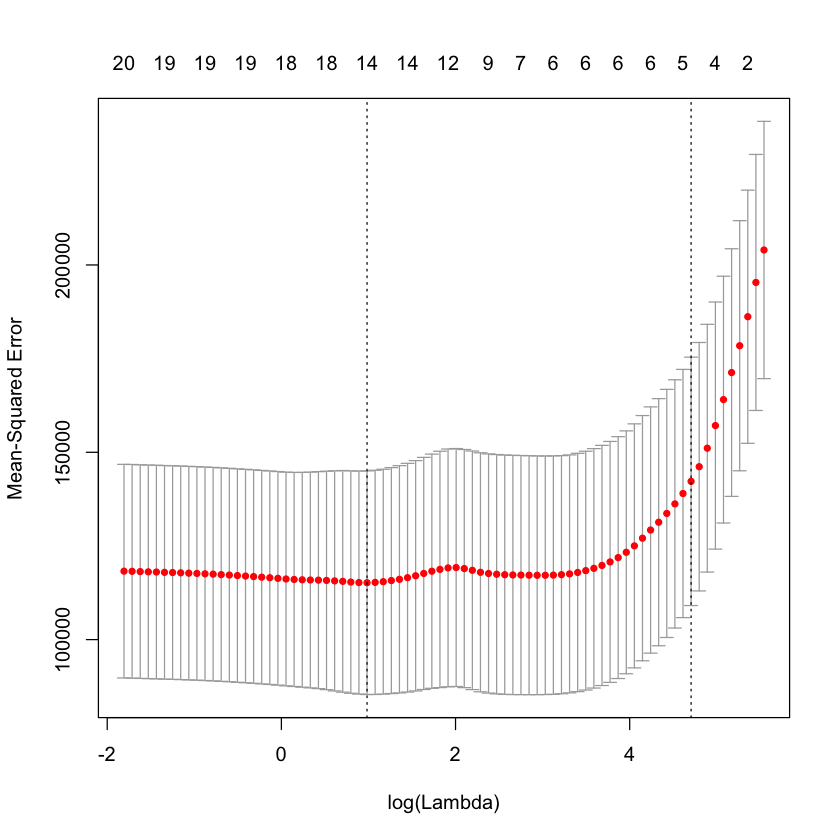

In [61]:
fit.lasso = glmnet(x, y)
plot(fit.lasso, xvar = 'lambda', label = TRUE)
cv.lasso=cv.glmnet(x,y)
plot(cv.lasso)

In [62]:
coef(cv.lasso)

21 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept) 251.4491565
AtBat         .        
Hits          1.0036044
HmRun         .        
Runs          .        
RBI           .        
Walks         0.9857987
Years         .        
CAtBat        .        
CHits         .        
CHmRun        .        
CRuns         0.1094218
CRBI          0.2911570
CWalks        .        
LeagueA       .        
LeagueN       .        
DivisionW     .        
PutOuts       .        
Assists       .        
Errors        .        
NewLeagueN    .        

Suppose we want to use our earlier train/validation division to select the 'lamda' for the lasso.
This is easy to do.

In [64]:
lasso.tr=glmnet(x[train,], y[train])
lasso.tr


Call:  glmnet(x = x[train, ], y = y[train]) 

      Df    %Dev   Lambda
 [1,]  0 0.00000 262.1000
 [2,]  1 0.05919 238.8000
 [3,]  1 0.10830 217.6000
 [4,]  1 0.14910 198.3000
 [5,]  2 0.19720 180.6000
 [6,]  3 0.23940 164.6000
 [7,]  3 0.27450 150.0000
 [8,]  3 0.30370 136.7000
 [9,]  3 0.32790 124.5000
[10,]  3 0.34800 113.5000
[11,]  4 0.36500 103.4000
[12,]  5 0.38770  94.1900
[13,]  6 0.40900  85.8200
[14,]  6 0.42730  78.2000
[15,]  6 0.44250  71.2500
[16,]  6 0.45510  64.9200
[17,]  6 0.46550  59.1500
[18,]  6 0.47420  53.9000
[19,]  6 0.48140  49.1100
[20,]  6 0.48740  44.7500
[21,]  6 0.49240  40.7700
[22,]  6 0.49650  37.1500
[23,]  6 0.49990  33.8500
[24,]  7 0.50280  30.8400
[25,]  7 0.50510  28.1000
[26,]  8 0.50710  25.6100
[27,]  8 0.50940  23.3300
[28,]  8 0.51120  21.2600
[29,]  8 0.51280  19.3700
[30,]  8 0.51410  17.6500
[31,]  8 0.51520  16.0800
[32,]  8 0.51600  14.6500
[33,]  8 0.51680  13.3500
[34,]  9 0.51750  12.1700
[35,]  9 0.51990  11.0800
[36,] 10 0.52230 

[1] 83 83

[1] 1.571184

21 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  284.22742427
AtBat         -1.14830040
Hits           4.92901730
HmRun          .         
Runs          -3.51936866
RBI            0.38309009
Walks          6.01828596
Years        -20.74174043
CAtBat        -0.01903175
CHits          0.08077424
CHmRun         0.53493799
CRuns          0.77272746
CRBI           0.49203970
CWalks        -0.47458673
LeagueA      -91.21313136
LeagueN        .         
DivisionW   -161.10222986
PutOuts        0.28639231
Assists        0.29245560
Errors        -4.69237401
NewLeagueN   -56.95409378

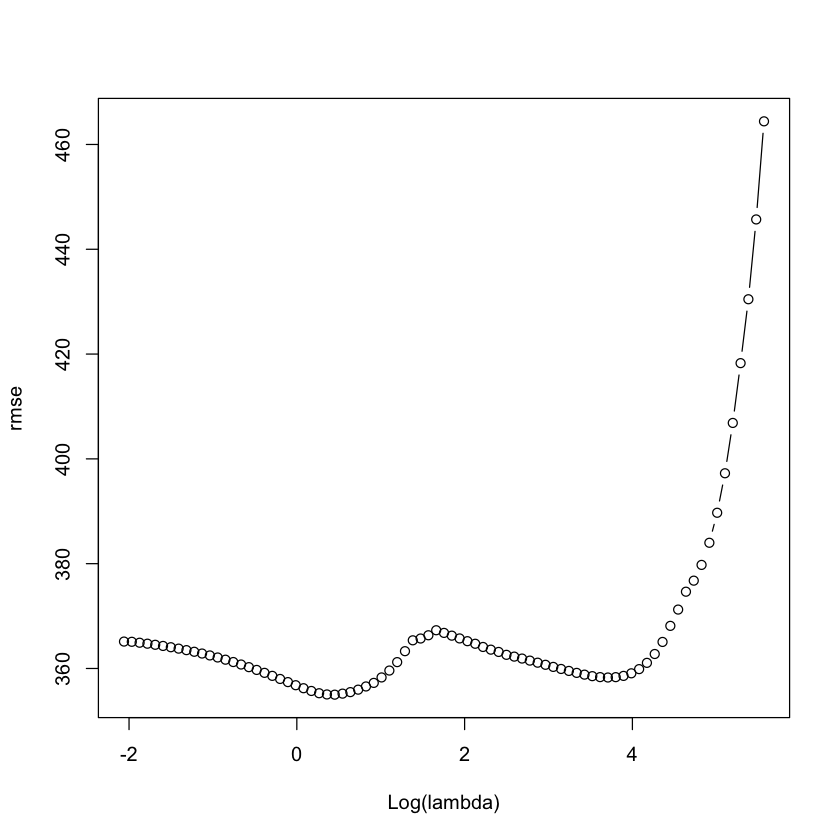

In [66]:
pred=predict(lasso.tr, x[-train,])
dim(pred)
rmse=sqrt(apply((y[-train]-pred)^2, 2, mean))
plot(log(lasso.tr$lambda), rmse, type = 'b', xlab = "Log(lambda)")
lam.best = lasso.tr$lambda[order(rmse)[1]]
lam.best
coef(lasso.tr, s=lam.best)